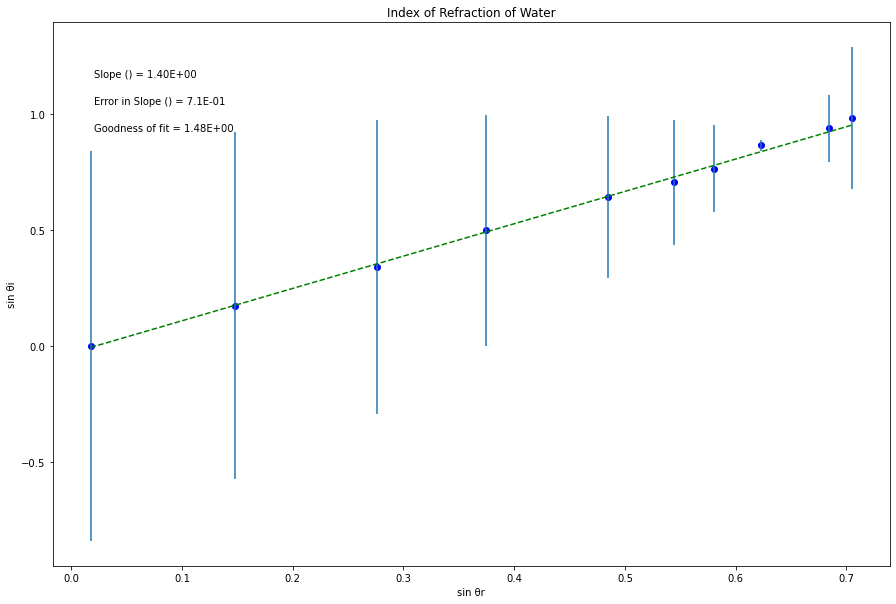

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

thta_i = np.array([0, 10, 20, 30, 40, 45, 50, 60, 70, 80])
thta_r = np.array([1, 8.5, 16, 22, 29, 33, 35.5, 38.5, 43.2, 44.8])

#degrees to radians
theta_i = np.deg2rad(thta_i)
theta_r = np.deg2rad(thta_r)

#sin of theta
s_theta_i = np.sin(theta_i)
s_theta_r = np.sin(theta_r)

#y = sin_theta_i
err_y = np.sin(theta_i + 1.0) - np.sin(theta_i)
err_x = np.sin(theta_r + 1.0) - np.sin(theta_r)

x = s_theta_r   
y = s_theta_i
dy = err_y

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

fit = b+m*x

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
#plotting
plt.xlabel('sin θr')
plt.ylabel('sin θi')
plt.title('Index of Refraction of Water')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope () = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope () = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()


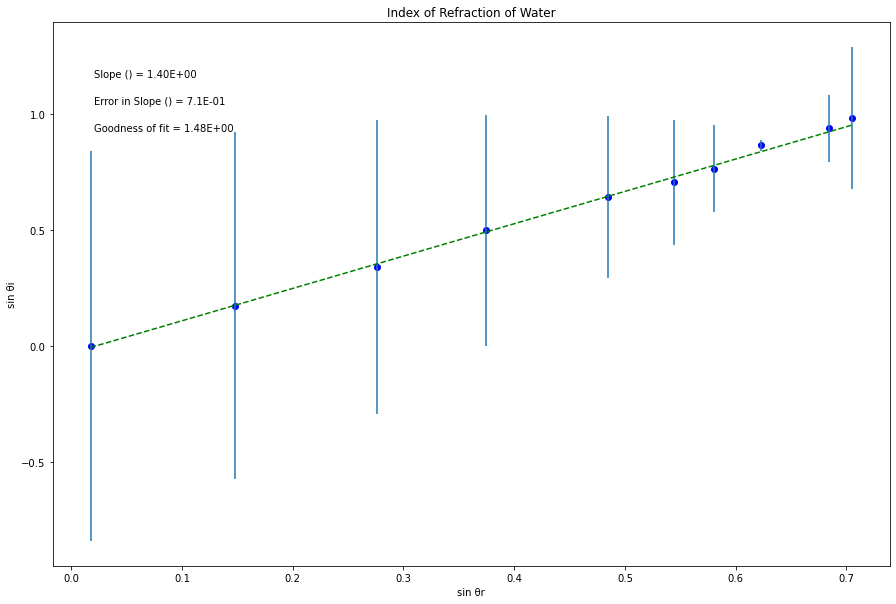